In [1]:
# Load the required libraries
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Loading different datasets

In [2]:
path = '../data/'

files = os.listdir(path)

print('All files:')
for f in files:
	print(f,end='\t')
    
print('csv files')
for f in files:
    if '.csv' in f:
        print(f,end='\t')


All files:
timesData.csv	cwurData.csv	archive.zip	shanghaiData.csv	school_and_country_table.csv	education_expenditure_supplementary_data.csv	educational_attainment_supplementary_data.csv	csv files
timesData.csv	cwurData.csv	shanghaiData.csv	school_and_country_table.csv	education_expenditure_supplementary_data.csv	educational_attainment_supplementary_data.csv	

## timesData

In [3]:
timesData = pd.read_csv('../data/timesData.csv')
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

### Data cleanup
1. international_students: remove %
2. female-male ratio: split column

In [4]:
timesData['international'] = pd.to_numeric(timesData['international'], errors='coerce')
timesData['income'] = pd.to_numeric(timesData['income'], errors='coerce')
timesData['total_score'] = pd.to_numeric(timesData['total_score'], errors='coerce')

In [5]:
def convertcomma(x):
    if isinstance(x, str):
        x = x.replace(',','')
    return x
timesData['num_students']= timesData['num_students'].apply(lambda x: convertcomma(x))
timesData['num_students'] = pd.to_numeric(timesData['num_students'], errors='coerce')

In [6]:
def convertpercentage(x):
    if isinstance(x, str):
        x = x.replace('%','')
    return x
timesData['international_students'] = timesData['international_students'].apply(lambda x: convertpercentage(x))
timesData['international_students'] = pd.to_numeric(timesData['international_students'], errors='coerce')

In [7]:
timesData[['female','male']] = timesData['female_male_ratio'].str.split(':',expand=True) 
timesData['female'] = pd.to_numeric(timesData['female'], errors='coerce')
timesData['male'] = pd.to_numeric(timesData['male'], errors='coerce')

In [8]:
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2594 non-null   float64
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2385 non-null   float64
 8   total_score             1201 non-null   float64
 9   num_students            2544 non-null   float64
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   float64
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
 14  female                  2367 non-null   

## pairplot

In [13]:
timesData['world_rank'] = pd.to_numeric(timesData['world_rank'], errors='coerce')

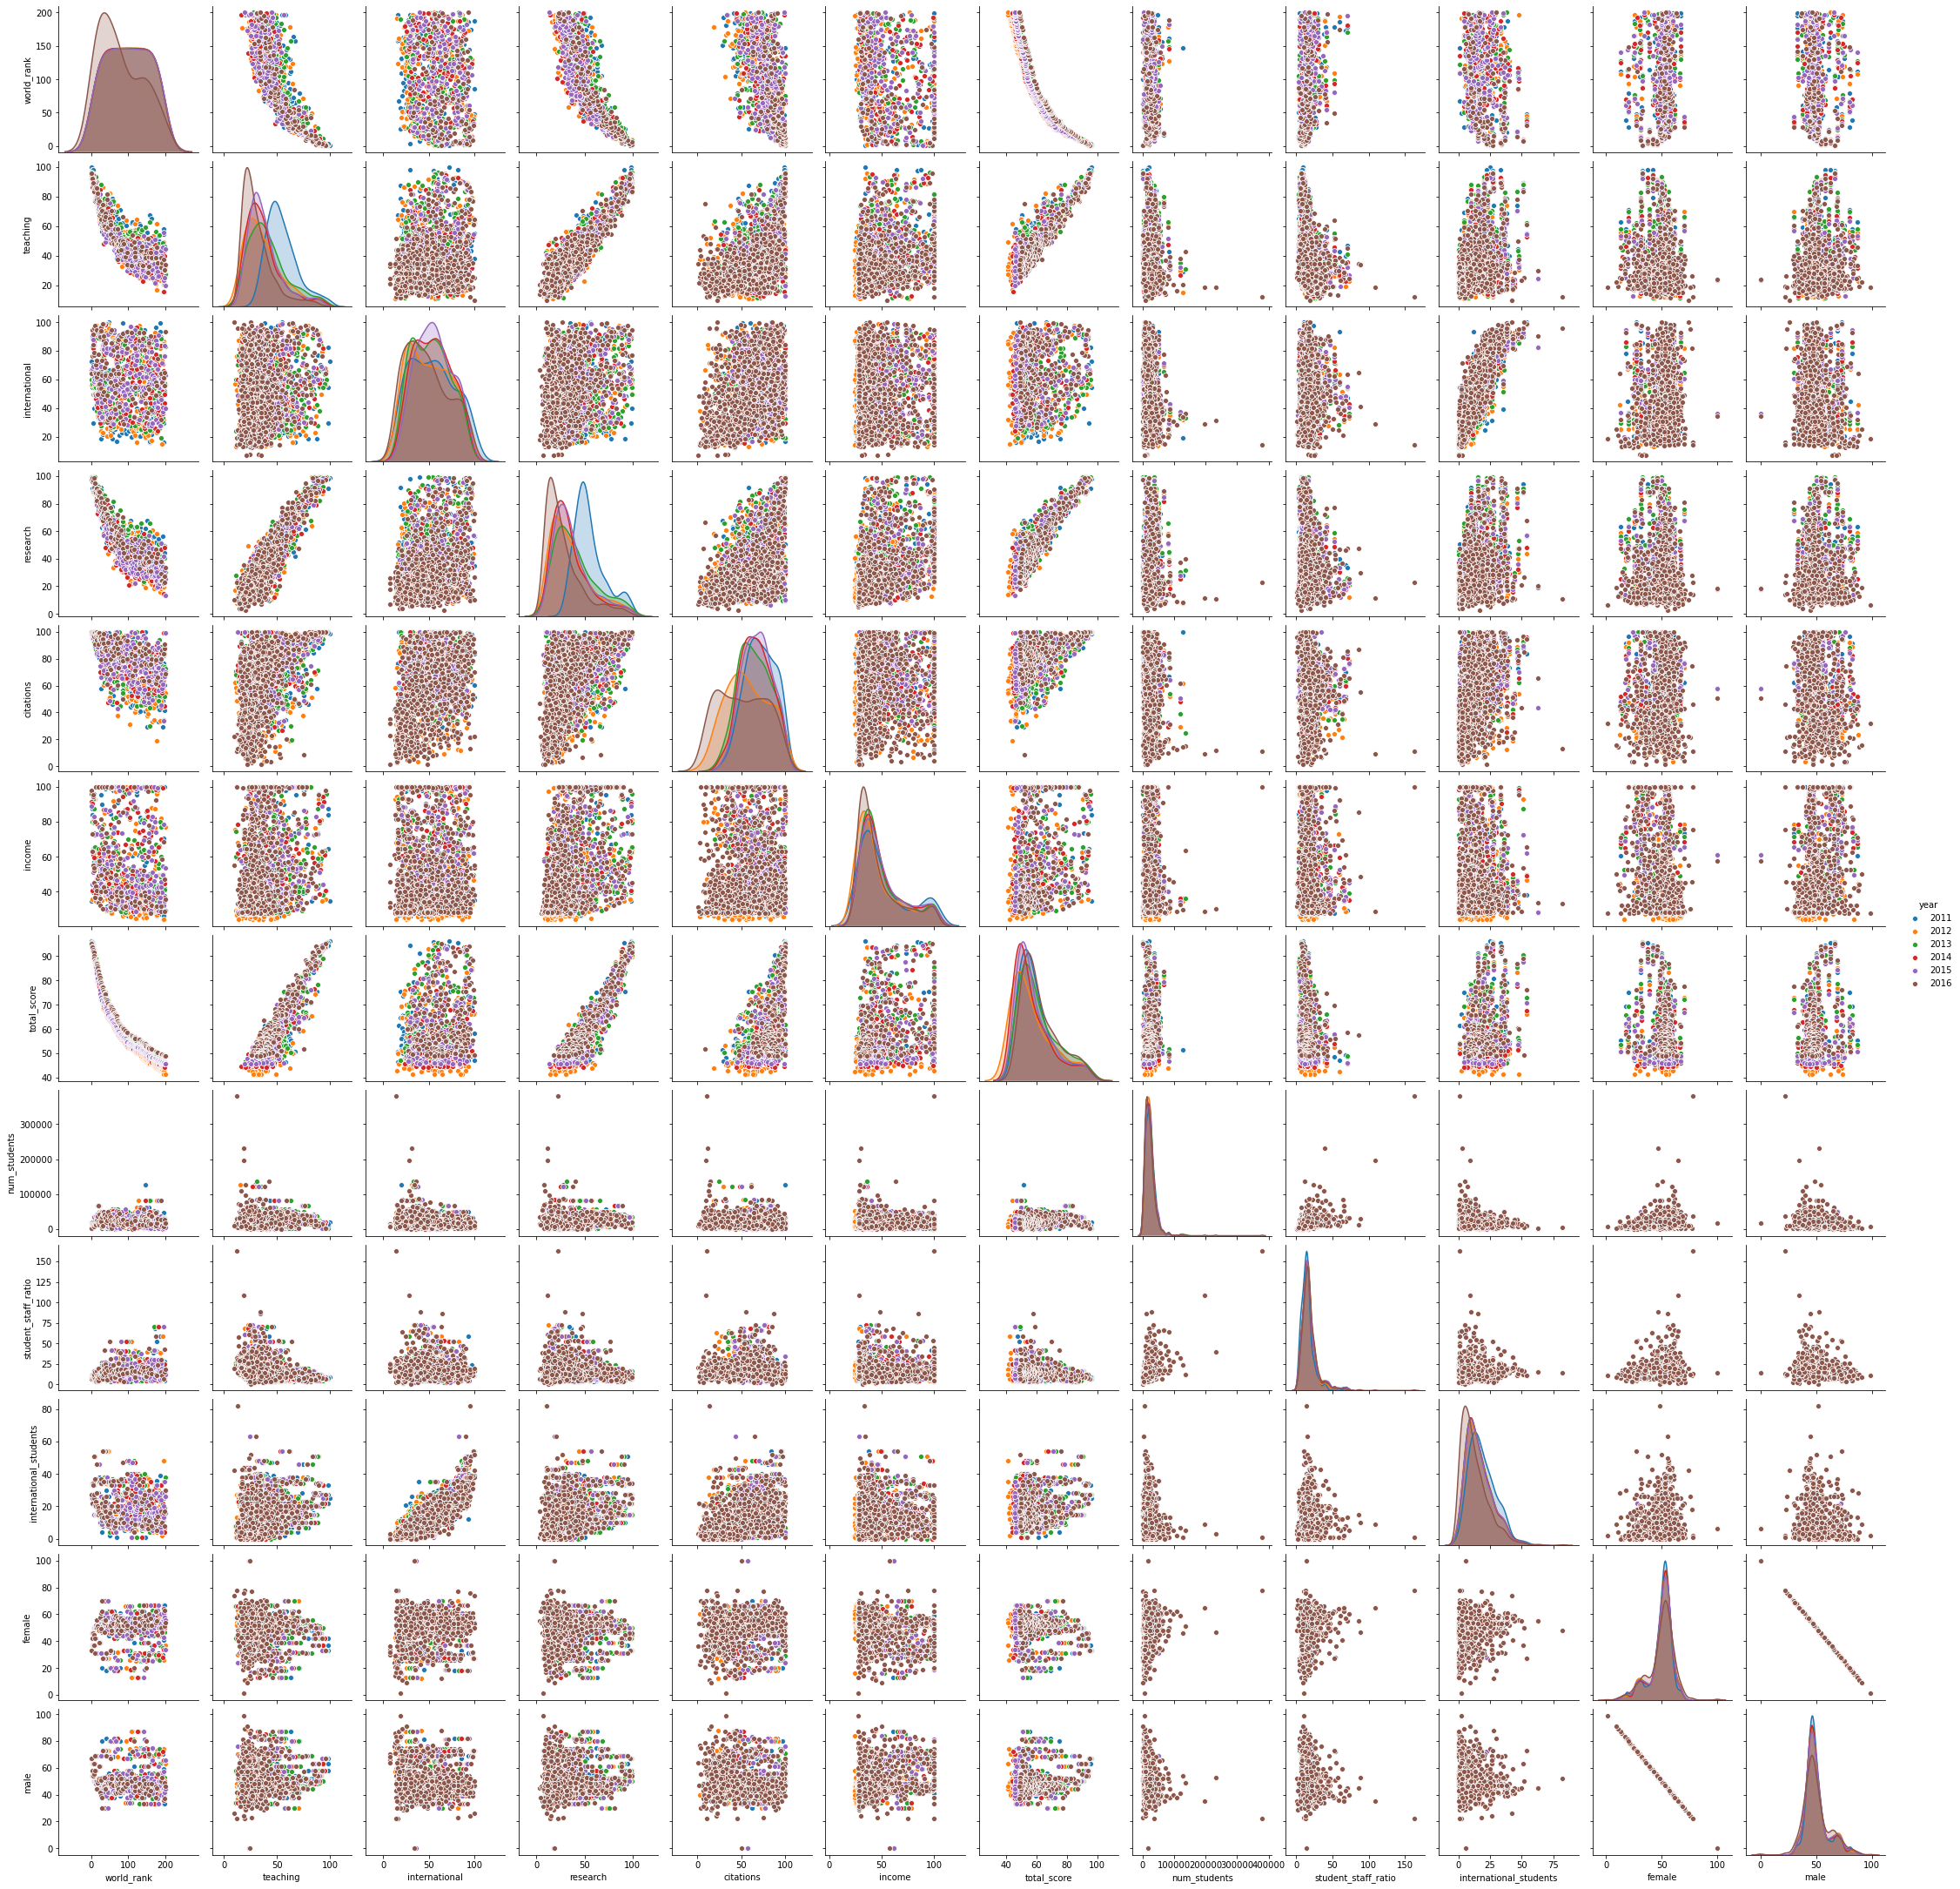

In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
timesData_numeric = [c for c in timesData.select_dtypes(include=numerics).columns.tolist() if 'year' not in c]
sns.pairplot(data=timesData, vars=timesData_numeric, hue='year')

## Correlation map

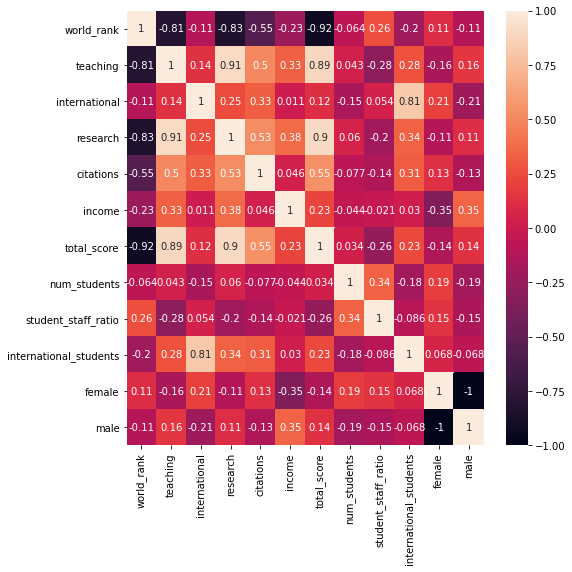

In [17]:
fig,ax = plt.subplots(figsize=(8,8))
sns.heatmap(timesData[timesData_numeric].corr(), annot=True, ax=ax)

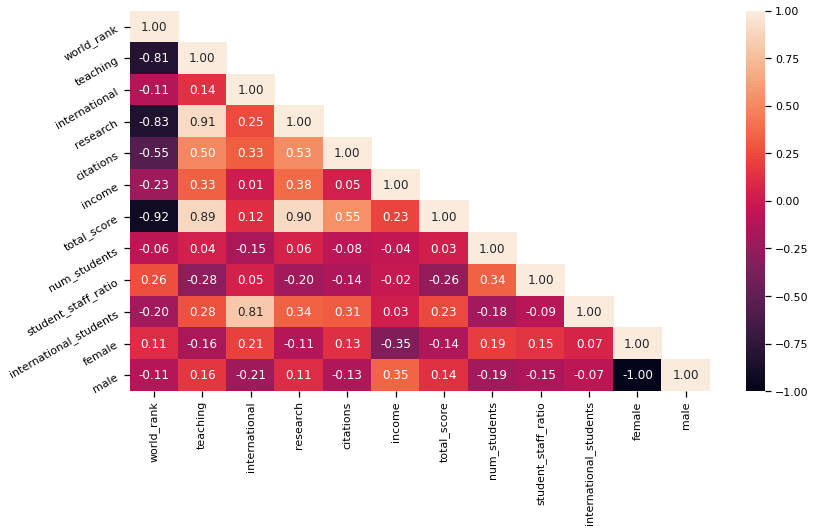

In [18]:
#Correlation with heat map
corr = timesData[timesData_numeric].corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

## Countplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71]),
 <a list of 72 Text major ticklabel objects>)

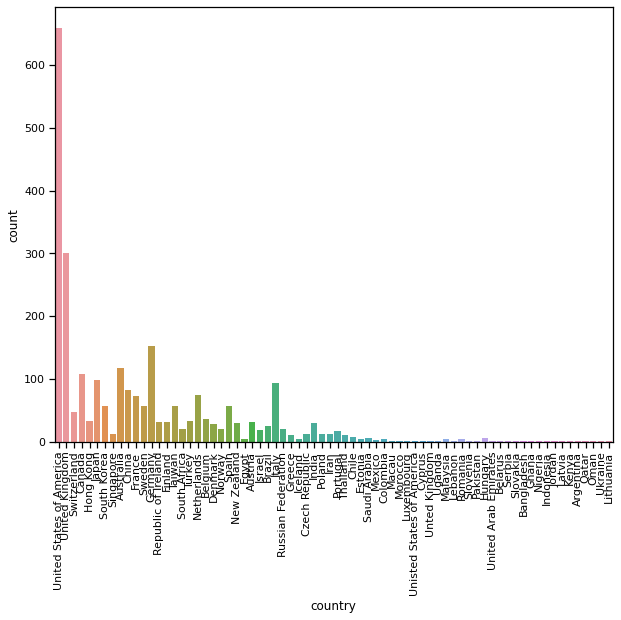

In [26]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=timesData, x='country')
plt.xticks(rotation=90)